In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()  # Enable progress_apply with progress bar in Jupyter environments
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim.matutils import Sparse2Corpus
from gensim import models
from scipy.sparse import csr_matrix
import missingno as msno
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm


In [2]:
df = pd.read_excel('/Users/ruimaciel/Desktop/Barcelona/Master_Thesis/ECB_Perceived_Cacophony/combined_updated.xlsx')
df.head(20)

,Date,Source,Headline,Translated.headline,Manual.summary,Original.article.url,Translated.text,Media.type,Speaker,Reach,Language,Country.Code,Sitename,Tags,Site_Readership,Article_Readership
0,2022-09-30 22:08:34,Il Messaggero - Borsa Italiana,"Visco: «Troppi rialzi dei tassi, si va in rece...","Banca d'Italia's Visco: ""Too many rate hikes w...","At a conference in Florence, Banca d'Italia Go...",https://www.ilmessaggero.it/economia/news/tass...,No to an excessive rise in rates. The Governor...,WEB,Newspapers,1174293,it,IT,Il Messaggero,"European Central Bank, European Monetary Union...",2296944.0,0.0
1,2022-09-30 21:44:15,Puls Biznesu - Z ostatniej chwili,Knot: kolejne podwyżki stóp EBC są konieczne,Knot: further ECB rate hikes are necessary,NaN,https://www.pb.pl/knot-kolejne-podwyzki-stop-e...,Klaas knot photo by Zach Gibson/Bloomberg The ...,WEB,Newspapers,72409,pl,PL,Puls Biznesu,"European Central Bank, Inflation, Rank 2, Inte...",73998.0,0.0
2,2022-09-30 21:30:13,Handelsblatt - Finanzen,EZB-Ratsmitglied Visco: Rezessionsrisiko bei g...,ECB 's Visco: Recession risk in the event of m...,Banca d'Italia Governor Ignazio Visco on Fri...,https://www.handelsblatt.com/finanzen/geldpoli...,NaN,WEB,Newspapers,525924,de,DE,Handelsblatt,"European Central Bank, European Monetary Union...",314148.0,811493.0
3,2022-09-30 21:07:32,Trend - Správy,ECB by mala byť pri zvyšovaní sadzieb opatrná...,"ECB should be cautious about rate hikes, says...",NaN,https://www.trend.sk/spravy/ecb-mala-byt-pri-z...,"The governor of the Italian central bank, Igna...",WEB,Net Magazine,51466,sk,SK,Trend,"European Central Bank, Inflation, Rank 2, Inte...",53064.0,0.0
4,2022-09-30 20:56:08,Bloomberg - GNews,ECB 's Schnabel Says Weaker Demand May Not Eas...,ECB 's Schnabel says weaker demand may not eas...,ECB Executive Board Member Isabel Schnabel ...,https://www.bloomberg.com/news/articles/2022-0...,European Central Bank Executive Board member I...,WEB,Net Magazine,2520979,en,US,Bloomberg,"European Central Bank, Inflation, Rank 1, Core...",1309524.0,278016.0
5,2022-09-30 19:47:02,Trend. - Home,"EZB-Direktorin Schnabel für ""robustes"" Handeln","ECB Executive Board Member Schnabel is for ""r...",NaN,https://www.trend.at/news/ezb-direktorin-schna...,NaN,WEB,Net Magazine,6890,de,AT,Trend.,"European Central Bank, European Monetary Union...",17212.0,0.0
6,2022-09-30 19:17:43,Rai News 24 - Economia e finanza,"Visco: ""Lo shock energetico è un onere ineludi...","Visco: ""Energy shock is an unavoidable burden....",NaN,https://www.rainews.it/articoli/2022/09/visco-...,NaN,WEB,Net Magazine,1084479,it,IT,Rai News 24,"European Central Bank, European Monetary Union...",761567.0,0.0
7,2022-09-30 19:11:05,Tgcom24,"Bce: Schnabel, necessari ulteriori rialzi dei ...","ECB : Schnabel, further rate hikes necessary",NaN,http://finanza.tgcom24.mediaset.it/news/dettag...,"MILAN (MF-DJ)--""Further increases in our rates...",WEB,Broadcasting,1334829,it,IT,Tgcom24,"European Central Bank, Rank 2, Mandate (price ...",NaN,0.0
8,2022-09-30 19:11:05,Tgcom24,Bce: Schnabel non vede rischio spirale salari-...,ECB : Schnabel sees no risk of spiraling wages...,NaN,http://finanza.tgcom24.mediaset.it/news/dettag...,"MILAN (MF-DJ)--""If long-term inflation expecta...",WEB,Broadcasting,1334829,it,IT,Tgcom24,"European Central Bank, Rank 2, Other Forecasts...",NaN,0.0
9,2022-09-30 18:53:08,Der Aktionär,EZB ‑Geldpolitik: Ratsmitglied Visco warnt vor...,ECB monetary policy: Council member Visco war...,NaN,https://www.deraktionaer.de/artikel/maerkte-fo...,The fear of an approaching recession and furth...,WEB,Magazines,201926,de,DE,Der Aktionär,"European Central Bank, European Monetary Union...",257689.0,0.0


In [3]:
#import plotly.io as pio
#pio.renderers.default = 'notebook'


# PreProcess Scraped Text

In [4]:
df_scraped = pd.read_excel('/Users/ruimaciel/Desktop/Barcelona/Master_Thesis/ECB_Perceived_Cacophony/combined_updated.xlsx')
df_scraped.head(20)

,Date,Source,Headline,Translated.headline,Manual.summary,Original.article.url,Translated.text,Media.type,Speaker,Reach,Language,Country.Code,Sitename,Tags,Site_Readership,Article_Readership
0,2022-09-30 22:08:34,Il Messaggero - Borsa Italiana,"Visco: «Troppi rialzi dei tassi, si va in rece...","Banca d'Italia's Visco: ""Too many rate hikes w...","At a conference in Florence, Banca d'Italia Go...",https://www.ilmessaggero.it/economia/news/tass...,No to an excessive rise in rates. The Governor...,WEB,Newspapers,1174293,it,IT,Il Messaggero,"European Central Bank, European Monetary Union...",2296944.0,0.0
1,2022-09-30 21:44:15,Puls Biznesu - Z ostatniej chwili,Knot: kolejne podwyżki stóp EBC są konieczne,Knot: further ECB rate hikes are necessary,NaN,https://www.pb.pl/knot-kolejne-podwyzki-stop-e...,Klaas knot photo by Zach Gibson/Bloomberg The ...,WEB,Newspapers,72409,pl,PL,Puls Biznesu,"European Central Bank, Inflation, Rank 2, Inte...",73998.0,0.0
2,2022-09-30 21:30:13,Handelsblatt - Finanzen,EZB-Ratsmitglied Visco: Rezessionsrisiko bei g...,ECB 's Visco: Recession risk in the event of m...,Banca d'Italia Governor Ignazio Visco on Fri...,https://www.handelsblatt.com/finanzen/geldpoli...,NaN,WEB,Newspapers,525924,de,DE,Handelsblatt,"European Central Bank, European Monetary Union...",314148.0,811493.0
3,2022-09-30 21:07:32,Trend - Správy,ECB by mala byť pri zvyšovaní sadzieb opatrná...,"ECB should be cautious about rate hikes, says...",NaN,https://www.trend.sk/spravy/ecb-mala-byt-pri-z...,"The governor of the Italian central bank, Igna...",WEB,Net Magazine,51466,sk,SK,Trend,"European Central Bank, Inflation, Rank 2, Inte...",53064.0,0.0
4,2022-09-30 20:56:08,Bloomberg - GNews,ECB 's Schnabel Says Weaker Demand May Not Eas...,ECB 's Schnabel says weaker demand may not eas...,ECB Executive Board Member Isabel Schnabel ...,https://www.bloomberg.com/news/articles/2022-0...,European Central Bank Executive Board member I...,WEB,Net Magazine,2520979,en,US,Bloomberg,"European Central Bank, Inflation, Rank 1, Core...",1309524.0,278016.0
5,2022-09-30 19:47:02,Trend. - Home,"EZB-Direktorin Schnabel für ""robustes"" Handeln","ECB Executive Board Member Schnabel is for ""r...",NaN,https://www.trend.at/news/ezb-direktorin-schna...,NaN,WEB,Net Magazine,6890,de,AT,Trend.,"European Central Bank, European Monetary Union...",17212.0,0.0
6,2022-09-30 19:17:43,Rai News 24 - Economia e finanza,"Visco: ""Lo shock energetico è un onere ineludi...","Visco: ""Energy shock is an unavoidable burden....",NaN,https://www.rainews.it/articoli/2022/09/visco-...,NaN,WEB,Net Magazine,1084479,it,IT,Rai News 24,"European Central Bank, European Monetary Union...",761567.0,0.0
7,2022-09-30 19:11:05,Tgcom24,"Bce: Schnabel, necessari ulteriori rialzi dei ...","ECB : Schnabel, further rate hikes necessary",NaN,http://finanza.tgcom24.mediaset.it/news/dettag...,"MILAN (MF-DJ)--""Further increases in our rates...",WEB,Broadcasting,1334829,it,IT,Tgcom24,"European Central Bank, Rank 2, Mandate (price ...",NaN,0.0
8,2022-09-30 19:11:05,Tgcom24,Bce: Schnabel non vede rischio spirale salari-...,ECB : Schnabel sees no risk of spiraling wages...,NaN,http://finanza.tgcom24.mediaset.it/news/dettag...,"MILAN (MF-DJ)--""If long-term inflation expecta...",WEB,Broadcasting,1334829,it,IT,Tgcom24,"European Central Bank, Rank 2, Other Forecasts...",NaN,0.0
9,2022-09-30 18:53:08,Der Aktionär,EZB ‑Geldpolitik: Ratsmitglied Visco warnt vor...,ECB monetary policy: Council member Visco war...,NaN,https://www.deraktionaer.de/artikel/maerkte-fo...,The fear of an approaching recession and furth...,WEB,Magazines,201926,de,DE,Der Aktionär,"European Central Bank, European Monetary Union...",257689.0,0.0


In [5]:
df_scraped.shape

(35076, 16)

In [6]:
# Select rows where both 'Manual.summary' and 'Translated.text' are null or empty
null_rows = df[(df['Manual.summary'].isnull() | df['Manual.summary'].eq('')) & 
               (df['Translated.text'].isnull() | df['Translated.text'].eq(''))]

# Print the selected rows
print(null_rows)


                     Date                             Source  \
5     2022-09-30 19:47:02                      Trend. - Home   
6     2022-09-30 19:17:43  Rai News 24  - Economia e finanza   
12    2022-09-30 18:39:39  Affaritaliani Libero - Notiziario   
35    2022-09-30 13:10:39                Investor.Bg - Видео   
40    2022-09-30 09:22:50         Børsen - Pro International   
...                   ...                                ...   
29728 2023-12-06 10:55:34                  Bloomberg - News1   
29739 2023-12-06 08:20:16                   Bloomberg - Asia   
32754 2023-10-26 14:58:48                          HN Online   
32972 2023-10-25 10:40:21                   Bloomberg - Asia   
33441 2023-10-16 07:57:00         Børsen - Pro International   

                                                Headline  \
5         EZB-Direktorin Schnabel für "robustes" Handeln   
6      Visco: "Lo shock energetico è un onere ineludi...   
12     **Conti pubblici: Visco, rientro debito ben 

In [7]:
# Select rows where both 'Manual.summary' and 'Translated.text' are null or empty or contain '-'
null_rows = df_scraped[(df_scraped['Manual.summary'].isnull() | df_scraped['Manual.summary'].eq('') | df_scraped['Manual.summary'].eq('-')) & 
                       (df_scraped['Translated.text'].isnull() | df_scraped['Translated.text'].eq(''))]

# Count the number of rows where both 'Manual.summary' and 'Translated.text' are null or empty or contain '-'
count_both_missing = null_rows.shape[0]

# Calculate the total number of rows in the DataFrame
total_rows = df_scraped.shape[0]

# Calculate the percentage of rows where both 'Manual.summary' and 'Translated.text' are null or empty or contain '-'
percentage_both_missing = (count_both_missing / total_rows) * 100

# Print the number of rows and the percentage of total rows where both 'Manual.summary' and 'Translated.text' are null or empty or contain '-'
print(f"Number of rows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-': {count_both_missing}")
print(f"Percentage of total rows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-': {percentage_both_missing:.2f}%")

# Print the selected rows
print("\nRows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-':")
print(null_rows)


Number of rows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-': 1034
Percentage of total rows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-': 2.95%

Rows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-':
                     Date                             Source  \
5     2022-09-30 19:47:02                      Trend. - Home   
6     2022-09-30 19:17:43  Rai News 24  - Economia e finanza   
12    2022-09-30 18:39:39  Affaritaliani Libero - Notiziario   
35    2022-09-30 13:10:39                Investor.Bg - Видео   
40    2022-09-30 09:22:50         Børsen - Pro International   
...                   ...                                ...   
29728 2023-12-06 10:55:34                  Bloomberg - News1   
29739 2023-12-06 08:20:16                   Bloomberg - Asia   
32754 2023-10-26 14:58:48                          HN Online   
32972 2023-10-25 10:40:21                   Bloomberg 

### Preprocess Manual Summary and Scraped Text

In [8]:
# Download necessary NLTK resources if not already available
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Prepare the stopwords set once to avoid repeated loading
initial_stop_words = stopwords.words('english')
custom_stopwords = {
    'npagina', 'nfoglio', 'nquotidiano', 'ndi', 'nla', 'ndie', 'nder', 'ne', 'nlos', 'nde', 
    'na', 'nto', 'np', 'nel', 'nque', 'nen', 'ndel', 'cm'
}
stop_words = set(initial_stop_words).union(custom_stopwords)

def clean_text(text):
    """
    Perform initial cleaning of the text by removing URLs, numbers,
    non-alphabetic characters, and converting to lowercase.
    """
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\b\d+\b', '', text)  # Remove all standalone numbers
    text = re.sub(r'\bn[a-z]{2,}\b', '', text)  # Aggressively remove words starting with 'n' followed by at least two letters
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    return text.lower()

def tokenize(text, mode):
    """
    Tokenizes the text based on the given mode.
    Mode 0: Convert text to lowercase.
    Mode 1: Apply stemming.
    Mode 2: Apply lemmatization.
    """
    text = clean_text(text)  # Apply enhanced cleaning
    words = word_tokenize(text)
    if mode == 1:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words if word not in stop_words]
    elif mode == 2:
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    else:
        words = [word for word in words if word not in stop_words]

    return ' '.join(words)

def preprocess_texts(data_frame, column_name, mode):
    """
    Apply text preprocessing to a specified column in a DataFrame.
    """
    # Fill NaN values with empty strings before processing
    data_frame[column_name] = data_frame[column_name].fillna('')
    # Use tqdm to display progress while applying preprocessing
    tqdm.pandas(desc="Processing Texts")
    return data_frame[column_name].astype(str).progress_apply(lambda row: tokenize(row, mode))

In [9]:
import numpy as np
mod = 2  # Set the preprocessing mode to 2 for lemmatizing

# Reset the index of the DataFrame to avoid duplicate labels
df_scraped.reset_index(drop=True, inplace=True)

# Determine which column to preprocess for translated text
df_scraped['text_to_preprocess'] = np.where(df_scraped['Translated.text'].fillna('').str.strip() == '',
                                            df_scraped['Manual.summary'], 
                                            df_scraped['Translated.text'])

# Apply preprocessing to the determined text
df_scraped['translated_text_preproc'] = preprocess_texts(df_scraped, 'text_to_preprocess', mod)

# Apply preprocessing to the Manual.summary column
df_scraped['manual_summary_preproc'] = preprocess_texts(df_scraped, 'Manual.summary', mod)

# Remove the auxiliary column if no longer needed
df_scraped.drop(columns=['text_to_preprocess'], inplace=True)

# Display the result to verify
display(df_scraped[['Source', 'Manual.summary', 'Translated.text', 'Language', 'translated_text_preproc', 'manual_summary_preproc']].head(20))

Processing Texts: 100%|██████████| 35076/35076 [00:09<00:00, 3598.06it/s]


,Source,Manual.summary,Translated.text,Language,translated_text_preproc,manual_summary_preproc
0,Il Messaggero - Borsa Italiana,"At a conference in Florence, Banca d'Italia Go...",No to an excessive rise in rates. The Governor...,it,excessive rise rate governor bank italy vincen...,conference florence banca ditalia governor ign...
1,Puls Biznesu - Z ostatniej chwili,,Klaas knot photo by Zach Gibson/Bloomberg The ...,pl,klaas knot photo zach gibsonbloomberg head dut...,
2,Handelsblatt - Finanzen,Banca d'Italia Governor Ignazio Visco on Fri...,NaN,de,banca ditalia governor ignazio visco friday wa...,banca ditalia governor ignazio visco friday wa...
3,Trend - Správy,,"The governor of the Italian central bank, Igna...",sk,governor italian central bank ignazio visco wa...,
4,Bloomberg - GNews,ECB Executive Board Member Isabel Schnabel ...,European Central Bank Executive Board member I...,en,european central bank executive board member i...,ecb executive board member isabel schnabel sai...
5,Trend. - Home,,NaN,de,,
6,Rai News 24 - Economia e finanza,,NaN,it,,
7,Tgcom24,,"MILAN (MF-DJ)--""Further increases in our rates...",it,milan mfdjfurther increase rate n reference en...,
8,Tgcom24,,"MILAN (MF-DJ)--""If long-term inflation expecta...",it,milan mfdjif longterm inflation expectationsn ...,
9,Der Aktionär,,The fear of an approaching recession and furth...,de,fear approaching recession rising interest rat...,


# ECB Governors Checking

In [10]:
ECB_df = pd.read_csv('ecb_governing_council.csv')
ECB_df

,Full Name,First Name,Surname,Country,Position,Executive Role
0,Christine Lagarde,Christine,Lagarde,France,Executive Board,President
1,Luis de Guindos,Luis,de Guindos,Spain,Executive Board,Vice President
2,Piero Cipollone,Piero,Cipollone,Italy,Executive Board,Member of the Executive Board
3,Philip Lane,Philip,Lane,Republic of Ireland,Executive Board,Member of the Executive Board & Chief Economist
4,Frank Elderson,Frank,Elderson,Netherlands,Executive Board,Member of the Executive Board; Vice-chair of t...
5,Isabel Schnabel,Isabel,Schnabel,Germany,Executive Board,Member of the Executive Board
6,Pablo Hernandez de Cos,Pablo,Hernandez de Cos,Spain,National Governor,NaN
7,Joachim Nagel,Joachim,Nagel,Germany,National Governor,NaN
8,Pierre Wunsch,Pierre,Wunsch,Belgium,National Governor,NaN
9,Yannis Stournaras,Yannis,Stournaras,Greece,National Governor,NaN


In [11]:
# Function to generate name variations
def generate_name_variations(full_name, first_name, surname):
    variations = [
        full_name,
        first_name,
        surname,
        f"{first_name} {surname}",
        f"{surname} {first_name}",
        full_name.replace(" ", ""),
        first_name.replace(" ", ""),
        surname.replace(" ", ""),
    ]
    return list(set(variations))  # Ensure unique variations

# Function to count occurrences of names
def count_occurrences(text, names):
    count = 0
    for name in names:
        count += len(re.findall(rf'\b{name}\b', text, flags=re.IGNORECASE))
    return count

# Extract names and countries from ECB_df
full_names = ECB_df['Full Name'].tolist()
first_names = ECB_df['First Name'].tolist()
surnames = ECB_df['Surname'].tolist()
countries = ECB_df['Country'].tolist()  # Update variable name to 'countries'

# Create a list to store the results
results = []

# Generate name variations for each governor
name_variations_list = [
    generate_name_variations(row['Full Name'], row['First Name'], row['Surname'])
    for index, row in ECB_df.iterrows()
]

# Iterate through the governors and count occurrences in the preprocessed columns
for index, row in ECB_df.iterrows():
    full_name = row['Full Name']
    first_name = row['First Name']
    surname = row['Surname']
    country = row['Country']  # Include the country

    name_variations = generate_name_variations(full_name, first_name, surname)

    full_name_count_translated = df_scraped['translated_text_preproc'].apply(lambda x: count_occurrences(x, name_variations)).sum()
    first_name_count_translated = df_scraped['translated_text_preproc'].apply(lambda x: count_occurrences(x, [first_name])).sum()
    surname_count_translated = df_scraped['translated_text_preproc'].apply(lambda x: count_occurrences(x, [surname])).sum()

    full_name_count_manual = df_scraped['manual_summary_preproc'].apply(lambda x: count_occurrences(x, name_variations)).sum()
    first_name_count_manual = df_scraped['manual_summary_preproc'].apply(lambda x: count_occurrences(x, [first_name])).sum()
    surname_count_manual = df_scraped['manual_summary_preproc'].apply(lambda x: count_occurrences(x, [surname])).sum()

    results.append({
        'Governor': full_name,
        'Country': country,  # Include the country in the results
        'Full Name Count (Scraped Text)': full_name_count_translated,
        'First Name Count (Scraped Text)': first_name_count_translated,
        'Surname Count (Scraped Text)': surname_count_translated,
        'Full Name Count (Manual Summary)': full_name_count_manual,
        'First Name Count (Manual Summary)': first_name_count_manual,
        'Surname Count (Manual Summary)': surname_count_manual
    })

# Convert the results list to a DataFrame
count_df = pd.DataFrame(results)

# Display the result to verify
count_df.head(30)


,Governor,Country,Full Name Count (Scraped Text),First Name Count (Scraped Text),Surname Count (Scraped Text),Full Name Count (Manual Summary),First Name Count (Manual Summary),Surname Count (Manual Summary)
0,Christine Lagarde,France,63367,17556,30279,59803,17139,25630
1,Luis de Guindos,Spain,8593,2639,3773,8768,2410,3989
2,Piero Cipollone,Italy,962,281,452,858,252,361
3,Philip Lane,Republic of Ireland,7158,1986,3519,6127,1735,2727
4,Frank Elderson,Netherlands,832,401,288,639,208,263
5,Isabel Schnabel,Germany,7717,2191,3624,7572,2165,3255
6,Pablo Hernandez de Cos,Spain,974,972,0,910,910,0
7,Joachim Nagel,Germany,8156,2238,3913,8260,2317,3646
8,Pierre Wunsch,Belgium,1796,590,786,1619,455,724
9,Yannis Stournaras,Greece,2118,470,1211,2358,637,1094


In [12]:
# Function to generate name variations
def generate_name_variations(full_name, first_name, surname):
    variations = [
        full_name,
        first_name,
        surname,
        f"{first_name} {surname}",
        f"{surname} {first_name}",
        full_name.replace(" ", ""),
        first_name.replace(" ", ""),
        surname.replace(" ", ""),
    ]
    return list(set(variations))  # Ensure unique variations

# Function to count occurrences of names
def count_occurrences(text, names):
    count = 0
    for name in names:
        count += len(re.findall(rf'\b{name}\b', text, flags=re.IGNORECASE))
    return count

# Extract names and countries from ECB_df
full_names = ECB_df['Full Name'].tolist()
first_names = ECB_df['First Name'].tolist()
surnames = ECB_df['Surname'].tolist()
countries = ECB_df['Country'].tolist()  # Update variable name to 'countries'

# Create a list to store the results
results = []

# Generate name variations for each governor
name_variations_list = [
    generate_name_variations(row['Full Name'], row['First Name'], row['Surname'])
    for index, row in ECB_df.iterrows()
]

# Iterate through the governors and count occurrences in the preprocessed columns
for index, row in ECB_df.iterrows():
    full_name = row['Full Name']
    first_name = row['First Name']
    surname = row['Surname']
    country = row['Country']  # Include the country

    name_variations = generate_name_variations(full_name, first_name, surname)

    full_name_count_translated = df_scraped['translated_text_preproc'].apply(lambda x: count_occurrences(x, name_variations)).sum()
    first_name_count_translated = df_scraped['translated_text_preproc'].apply(lambda x: count_occurrences(x, [first_name])).sum()
    surname_count_translated = df_scraped['translated_text_preproc'].apply(lambda x: count_occurrences(x, [surname])).sum()

    full_name_count_manual = df_scraped['manual_summary_preproc'].apply(lambda x: count_occurrences(x, name_variations)).sum()
    first_name_count_manual = df_scraped['manual_summary_preproc'].apply(lambda x: count_occurrences(x, [first_name])).sum()
    surname_count_manual = df_scraped['manual_summary_preproc'].apply(lambda x: count_occurrences(x, [surname])).sum()

    results.append({
        'Governor': full_name,
        'Country': country,  # Include the country in the results
        'Full Name Count (Scraped Text)': full_name_count_translated,
        'First Name Count (Scraped Text)': first_name_count_translated,
        'Surname Count (Scraped Text)': surname_count_translated,
        'Full Name Count (Manual Summary)': full_name_count_manual,
        'First Name Count (Manual Summary)': first_name_count_manual,
        'Surname Count (Manual Summary)': surname_count_manual
    })

# Convert the results list to a DataFrame
count_df = pd.DataFrame(results)

# Display the result to verify
count_df.head(30)


,Governor,Country,Full Name Count (Scraped Text),First Name Count (Scraped Text),Surname Count (Scraped Text),Full Name Count (Manual Summary),First Name Count (Manual Summary),Surname Count (Manual Summary)
0,Christine Lagarde,France,63367,17556,30279,59803,17139,25630
1,Luis de Guindos,Spain,8593,2639,3773,8768,2410,3989
2,Piero Cipollone,Italy,962,281,452,858,252,361
3,Philip Lane,Republic of Ireland,7158,1986,3519,6127,1735,2727
4,Frank Elderson,Netherlands,832,401,288,639,208,263
5,Isabel Schnabel,Germany,7717,2191,3624,7572,2165,3255
6,Pablo Hernandez de Cos,Spain,974,972,0,910,910,0
7,Joachim Nagel,Germany,8156,2238,3913,8260,2317,3646
8,Pierre Wunsch,Belgium,1796,590,786,1619,455,724
9,Yannis Stournaras,Greece,2118,470,1211,2358,637,1094


In [13]:
import pandas as pd
import re

df_scraped['Name_of_Speaker'] = None  # Initialize the column

def check_and_return_full_name(text, name_variations, full_name):
    # First, check for the specific case of Martins Kazaks
    martins_kazaks_variations = ['mrti kazks', 'mrti', 'kazks']
    for mk_name in martins_kazaks_variations:
        if re.search(rf'\b{mk_name}\b', text, flags=re.IGNORECASE):
            return 'Martins Kazaks'
    # Then check other name variations
    for name in name_variations:
        if re.search(rf'\b{name}\b', text, flags=re.IGNORECASE):
            return full_name
    return None

# Assume generate_name_variations is a function that takes full name, first name, and surname and returns a list of name variations
# Iterate through each row in ECB_df to check matches in df_scraped
for index, row in ECB_df.iterrows():
    full_name = row['Full Name']
    name_variations = generate_name_variations(full_name, row['First Name'], row['Surname'])

    # Update df_scraped 'Name_of_Speaker' column where matches are found
    df_scraped['Name_of_Speaker'] = df_scraped.apply(
        lambda x: check_and_return_full_name(x['translated_text_preproc'], name_variations, full_name)
        if x['Name_of_Speaker'] is None else x['Name_of_Speaker'], axis=1)

    df_scraped['Name_of_Speaker'] = df_scraped.apply(
        lambda x: check_and_return_full_name(x['manual_summary_preproc'], name_variations, full_name)
        if x['Name_of_Speaker'] is None else x['Name_of_Speaker'], axis=1)

# Print updated DataFrame
print(df_scraped.head())


                 Date                             Source  \
0 2022-09-30 22:08:34     Il Messaggero - Borsa Italiana   
1 2022-09-30 21:44:15  Puls Biznesu - Z ostatniej chwili   
2 2022-09-30 21:30:13            Handelsblatt - Finanzen   
3 2022-09-30 21:07:32                     Trend - Správy   
4 2022-09-30 20:56:08                  Bloomberg - GNews   

                                            Headline  \
0  Visco: «Troppi rialzi dei tassi, si va in rece...   
1     Knot: kolejne podwyżki stóp  EBC  są konieczne   
2  EZB-Ratsmitglied Visco: Rezessionsrisiko bei g...   
3  ECB  by mala byť pri zvyšovaní sadzieb opatrná...   
4  ECB 's Schnabel Says Weaker Demand May Not Eas...   

                                 Translated.headline  \
0  Banca d'Italia's Visco: "Too many rate hikes w...   
1       Knot: further  ECB  rate hikes are necessary   
2  ECB 's Visco: Recession risk in the event of m...   
3  ECB  should be cautious about rate hikes, says...   
4  ECB 's Schnabel say

Name_of_Speaker
Christine Lagarde              19698
Luis de Guindos                 1899
Isabel Schnabel                 1274
Philip Lane                     1220
Joachim Nagel                   1183
Francois Villeroy de Galhau     1042
Fabio Panetta                    927
Pablo Hernandez de Cos           663
Mario Centeno                    633
Ignazio Visco                    607
Yannis Stournaras                420
Klaas Knot                       405
Robert Holzmann                  369
Martins Kazaks                   341
Pierre Wunsch                    275
Gediminas Simkus                 211
Piero Cipollone                  206
Gabriel Makhlouf                 181
Frank Elderson                   180
Peter Kazimir                    171
Olli Rehn                        160
Constantinos Herodotou           115
Bostjan Vasle                     90
Boris Vujcic                      77
Madis Muller                      64
Edward Scicluna                   12
Gaston Reinesch       

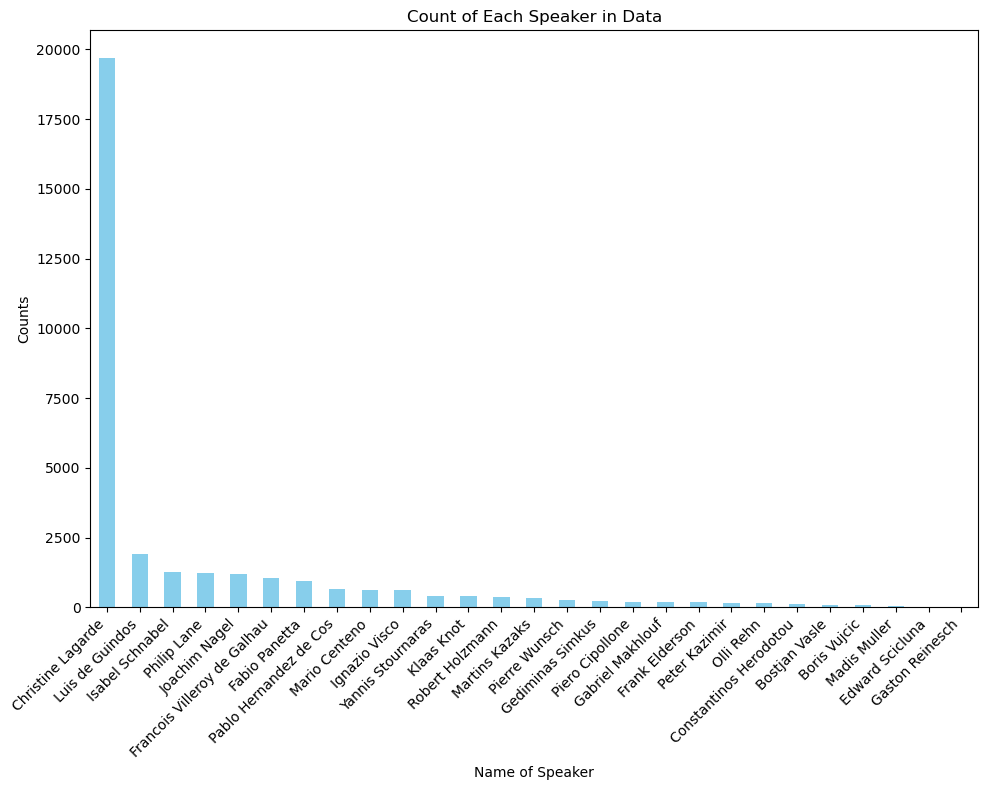

In [14]:
# Assuming df_scraped is already loaded with data

# Count occurrences of each unique value in 'Name_of_Speaker'
name_counts = df_scraped['Name_of_Speaker'].value_counts()
print(name_counts)


# Plotting the counts
plt.figure(figsize=(10, 8))  # Set the figure size for better readability
name_counts.plot(kind='bar', color='skyblue')  # Create a bar plot
plt.title('Count of Each Speaker in Data')  # Title of the plot
plt.xlabel('Name of Speaker')  # Label for the x-axis
plt.ylabel('Counts')  # Label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust subplots to give some padding
plt.show()  # Display the plot

In [15]:
#df_scraped.to_csv('df_scraped_with_names.csv', index=False)

# Checking the non-check

In [16]:
#df_scraped_2=pd.read_csv('df_scraped_with_names.csv')
#df_scraped_2.head(20)

,Date,Source,Headline,Translated.headline,Manual.summary,Original.article.url,Translated.text,Media.type,Speaker,Reach,Language,Country.Code,Sitename,Tags,Site_Readership,Article_Readership,translated_text_preproc,manual_summary_preproc,Name_of_Speaker
0,2022-09-30 22:08:34,Il Messaggero - Borsa Italiana,"Visco: «Troppi rialzi dei tassi, si va in rece...","Banca d'Italia's Visco: ""Too many rate hikes w...","At a conference in Florence, Banca d'Italia Go...",https://www.ilmessaggero.it/economia/news/tass...,No to an excessive rise in rates. The Governor...,WEB,Newspapers,1174293,it,IT,Il Messaggero,"European Central Bank, European Monetary Union...",2296944.0,0.0,excessive rise rate governor bank italy vincen...,conference florence banca ditalia governor ign...,Mario Centeno
1,2022-09-30 21:44:15,Puls Biznesu - Z ostatniej chwili,Knot: kolejne podwyżki stóp EBC są konieczne,Knot: further ECB rate hikes are necessary,NaN,https://www.pb.pl/knot-kolejne-podwyzki-stop-e...,Klaas knot photo by Zach Gibson/Bloomberg The ...,WEB,Newspapers,72409,pl,PL,Puls Biznesu,"European Central Bank, Inflation, Rank 2, Inte...",73998.0,0.0,klaas knot photo zach gibsonbloomberg head dut...,NaN,Klaas Knot
2,2022-09-30 21:30:13,Handelsblatt - Finanzen,EZB-Ratsmitglied Visco: Rezessionsrisiko bei g...,ECB 's Visco: Recession risk in the event of m...,Banca d'Italia Governor Ignazio Visco on Fri...,https://www.handelsblatt.com/finanzen/geldpoli...,NaN,WEB,Newspapers,525924,de,DE,Handelsblatt,"European Central Bank, European Monetary Union...",314148.0,811493.0,banca ditalia governor ignazio visco friday wa...,banca ditalia governor ignazio visco friday wa...,Ignazio Visco
3,2022-09-30 21:07:32,Trend - Správy,ECB by mala byť pri zvyšovaní sadzieb opatrná...,"ECB should be cautious about rate hikes, says...",NaN,https://www.trend.sk/spravy/ecb-mala-byt-pri-z...,"The governor of the Italian central bank, Igna...",WEB,Net Magazine,51466,sk,SK,Trend,"European Central Bank, Inflation, Rank 2, Inte...",53064.0,0.0,governor italian central bank ignazio visco wa...,NaN,Ignazio Visco
4,2022-09-30 20:56:08,Bloomberg - GNews,ECB 's Schnabel Says Weaker Demand May Not Eas...,ECB 's Schnabel says weaker demand may not eas...,ECB Executive Board Member Isabel Schnabel ...,https://www.bloomberg.com/news/articles/2022-0...,European Central Bank Executive Board member I...,WEB,Net Magazine,2520979,en,US,Bloomberg,"European Central Bank, Inflation, Rank 1, Core...",1309524.0,278016.0,european central bank executive board member i...,ecb executive board member isabel schnabel sai...,Isabel Schnabel
5,2022-09-30 19:47:02,Trend. - Home,"EZB-Direktorin Schnabel für ""robustes"" Handeln","ECB Executive Board Member Schnabel is for ""r...",NaN,https://www.trend.at/news/ezb-direktorin-schna...,NaN,WEB,Net Magazine,6890,de,AT,Trend.,"European Central Bank, European Monetary Union...",17212.0,0.0,NaN,NaN,NaN
6,2022-09-30 19:17:43,Rai News 24 - Economia e finanza,"Visco: ""Lo shock energetico è un onere ineludi...","Visco: ""Energy shock is an unavoidable burden....",NaN,https://www.rainews.it/articoli/2022/09/visco-...,NaN,WEB,Net Magazine,1084479,it,IT,Rai News 24,"European Central Bank, European Monetary Union...",761567.0,0.0,NaN,NaN,NaN
7,2022-09-30 19:11:05,Tgcom24,"Bce: Schnabel, necessari ulteriori rialzi dei ...","ECB : Schnabel, further rate hikes necessary",NaN,http://finanza.tgcom24.mediaset.it/news/dettag...,"MILAN (MF-DJ)--""Further increases in our rates...",WEB,Broadcasting,1334829,it,IT,Tgcom24,"European Central Bank, Rank 2, Mandate (price ...",NaN,0.0,milan mfdjfurther increase rate n reference en...,NaN,Isabel Schnabel
8,2022-09-30 19:11:05,Tgcom24,Bce: Schnabel non vede rischio spirale salari-...,ECB : Schnabel sees no risk of spiraling wages...,NaN,http://finanza.tgcom24.mediaset.it/news/dettag...,"MILAN (MF-DJ)--""If long-term inflation expecta...",WEB,Broadcasting,1334829,it,IT,Tgcom24,"European Central Bank, Rank 2, Other Forecasts...",NaN,0.0,milan mfdji

In [17]:
# Print the rows which Manual.Summary is Nan or it has less than 10 characters
print(df_scraped_2[(df_scraped_2['manual_summary_preproc'].isnull()) & (df_scraped_2['Name_of_Speaker'].isnull())])
# Count the rows which Manual.Summary is Nan or it has less than 10 characters
print(df_scraped_2[(df_scraped_2['manual_summary_preproc'].isnull()) & (df_scraped_2['Name_of_Speaker'].isnull())].shape[0])


                      Date                             Source  \
5      2022-09-30 19:47:02                      Trend. - Home   
6      2022-09-30 19:17:43  Rai News 24  - Economia e finanza   
12     2022-09-30 18:39:39  Affaritaliani Libero - Notiziario   
31     2022-09-30 13:50:51         Børsen - Pro International   
35     2022-09-30 13:10:39                Investor.Bg - Видео   
...                    ...                                ...   
32972  2023-10-25 10:40:21                   Bloomberg - Asia   
33441  2023-10-16 07:57:00         Børsen - Pro International   
33662  2023-10-12 07:13:45                  Bloomberg - News1   
33947  2023-10-06 15:44:49          Dagens Industri - Nyheter   
33949  2023-10-06 15:42:15                       Puls Biznesu   

                                                Headline  \
5         EZB-Direktorin Schnabel für "robustes" Handeln   
6      Visco: "Lo shock energetico è un onere ineludi...   
12     **Conti pubblici: Visco, rientro

In [18]:
#Create a dataframe only with the manual_summary_preproc is null
df_scraped_null = df_scraped_2[(df_scraped_2['manual_summary_preproc'].isnull()) & (df_scraped_2['Name_of_Speaker'].isnull())]
df_scraped_null.head(20)


,Date,Source,Headline,Translated.headline,Manual.summary,Original.article.url,Translated.text,Media.type,Speaker,Reach,Language,Country.Code,Sitename,Tags,Site_Readership,Article_Readership,translated_text_preproc,manual_summary_preproc,Name_of_Speaker
5,2022-09-30 19:47:02,Trend. - Home,"EZB-Direktorin Schnabel für ""robustes"" Handeln","ECB Executive Board Member Schnabel is for ""r...",NaN,https://www.trend.at/news/ezb-direktorin-schna...,NaN,WEB,Net Magazine,6890,de,AT,Trend.,"European Central Bank, European Monetary Union...",17212.0,0.0,NaN,NaN,NaN
6,2022-09-30 19:17:43,Rai News 24 - Economia e finanza,"Visco: ""Lo shock energetico è un onere ineludi...","Visco: ""Energy shock is an unavoidable burden....",NaN,https://www.rainews.it/articoli/2022/09/visco-...,NaN,WEB,Net Magazine,1084479,it,IT,Rai News 24,"European Central Bank, European Monetary Union...",761567.0,0.0,NaN,NaN,NaN
12,2022-09-30 18:39:39,Affaritaliani Libero - Notiziario,"**Conti pubblici: Visco, rientro debito ben in...","Public accounts: Visco, debt repayment well ad...",NaN,https://www.affaritaliani.it/notiziario/conti-...,NaN,WEB,Net Magazine,332687,it,IT,Affaritaliani Libero,"European Central Bank, European Monetary Union...",674955.0,0.0,NaN,NaN,NaN
31,2022-09-30 13:50:51,Børsen - Pro International,ECB Officials Lay Foundation for Significant ...,ECB Officials Lay Foundation for Significant ...,NaN,https://borsen.dk/nyheder/prointernational/eco...,European Central Bank officials are already st...,WEB,Newspapers,90394,en,DK,Børsen,"European Central Bank, European Monetary Union...",126134.0,0.0,european central bank official already staking...,NaN,NaN
35,2022-09-30 13:10:39,Investor.Bg - Видео,Сентено: ЕЦБ трябва да е премерена и баланси...,Centeno: The ECB must be measured and balanced,NaN,https://www.investor.bg/a/502-ad-hoc/361078-se...,NaN,WEB,Net Magazine,72859,bg,BG,Investor.Bg,"European Central Bank, European Monetary Union...",116491.0,0.0,NaN,NaN,NaN
40,2022-09-30 09:22:50,Børsen - Pro International,French Inflation Unexpectedly Eases as ECB W...,French Inflation Unexpectedly Eases as ECB W...,NaN,https://borsen.dk/nyheder/prointernational/mar...,NaN,WEB,Newspapers,90394,en,DK,Børsen,"European Central Bank, European Union and Memb...",126149.0,0.0,NaN,NaN,NaN
41,2022-09-30 09:22:13,Tgcom24 - Primo piano,"Totoministri, si lavora alla squadra: nomi e i...",Working on the team of ministers: names and hy...,NaN,https://www.tgcom24.mediaset.it/elezioni/polit...,But the list continues to change. The most dis...,WEB,Broadcasting,1334829,it,IT,Tgcom24,"European Central Bank, European Union and Memb...",NaN,0.0,list continues change discussed area remains j...,NaN,NaN
42,2022-09-30 09:19:43,COPE - Portada,"La situación económica y política de España, a...",La Toja Forum: Spain's economic and political ...,NaN,https://www.cope.es/actualidad/espana/noticias...,NaN,WEB,Newspapers,628781,es,ES,COPE,"European Central Bank, European Union and Memb...",408939.0,352816.0,NaN,NaN,NaN
69,2022-09-30 03:00:00,"ZIARUL FINANCIAR, page 10",Taxati bogatii pentru a ajuta victimele crizei...,Taxing the rich to help victims of energy cris...,NaN,https://paper.opoint.com/?id_site=329407&id_ar...,NaN,PRINT,Magazines,3500,ro,RO,ZIARUL FINANCIAR,"European Central Bank, Rank 1, Philip Lane, Co...",NaN,NaN,NaN,NaN,NaN
95,2022-09-29 20:53:21,Børsen - Nyheder,ECB-medlem: Når ikke inflation på 2 pct. uden ...,ECB member: Does not reach inflation at 2% wi...,NaN,https://borsen.dk/nyheder/okonomi/ecb-medlem-n...,NaN,WEB,Newspapers,90394,da,DK,Børsen,"European Central Bank, Inflation, Rank 3, Inte...",126193.0,0.0,NaN,NaN,NaN


In [19]:
print(df_scraped_null.shape[0])

1480


In [20]:
# Print the rows where both 'manual_summary_preproc' and 'Name_of_Speaker' are NaN
print(df_scraped_2[(df_scraped_2['manual_summary_preproc'].isnull()) & (df_scraped_2['Name_of_Speaker'].isnull())])

# Print the total number of rows before removing any
print("Total rows before removing any:", df_scraped_2.shape[0])

# Remove rows where 'manual_summary_preproc' is null or 'Name_of_Speaker' is null
df_scraped_2 = df_scraped_2[~(df_scraped_2['manual_summary_preproc'].isnull() & df_scraped_2['Name_of_Speaker'].isnull())]

# Print the total number of rows after removing rows where 'manual_summary_preproc' or 'Name_of_Speaker' is null
print("Total rows after removing rows with any NaNs in 'manual_summary_preproc' or 'Name_of_Speaker':", df_scraped_2.shape[0])


                      Date                             Source  \
5      2022-09-30 19:47:02                      Trend. - Home   
6      2022-09-30 19:17:43  Rai News 24  - Economia e finanza   
12     2022-09-30 18:39:39  Affaritaliani Libero - Notiziario   
31     2022-09-30 13:50:51         Børsen - Pro International   
35     2022-09-30 13:10:39                Investor.Bg - Видео   
...                    ...                                ...   
32972  2023-10-25 10:40:21                   Bloomberg - Asia   
33441  2023-10-16 07:57:00         Børsen - Pro International   
33662  2023-10-12 07:13:45                  Bloomberg - News1   
33947  2023-10-06 15:44:49          Dagens Industri - Nyheter   
33949  2023-10-06 15:42:15                       Puls Biznesu   

                                                Headline  \
5         EZB-Direktorin Schnabel für "robustes" Handeln   
6      Visco: "Lo shock energetico è un onere ineludi...   
12     **Conti pubblici: Visco, rientro

In [21]:
#Check the percentage of null_rows in the 'Name_of_Speaker' column
null_rows = df_scraped[df_scraped['Name_of_Speaker'].isnull()]
count_both_missing = null_rows.shape[0]
total_rows = df_scraped.shape[0]
percentage_both_missing_1 = (count_both_missing / total_rows) * 100

print(f"Number of rows where 'Name_of_Speaker' is null in df_shaped: {count_both_missing}")
print (f"Percentage of total rows where 'Name_of_Speaker' is null in df_shaped: {percentage_both_missing_1:.2f}%")

#Check the percentage of null_rows in the 'Name_of_Speaker' column
null_rows = df_scraped_2[df_scraped_2['Name_of_Speaker'].isnull()]
count_both_missing = null_rows.shape[0]
total_rows = df_scraped_2.shape[0]
percentage_both_missing_2 = (count_both_missing / total_rows) * 100

print(f"Number of rows where 'Name_of_Speaker' is null in df_shaped_2: {count_both_missing}")
print (f"Percentage of total rows where 'Name_of_Speaker' is null in df_shaped_2: {percentage_both_missing_2:.2f}%")

Number of rows where 'Name_of_Speaker' is null in df_shaped: 2648
Percentage of total rows where 'Name_of_Speaker' is null in df_shaped: 7.55%
Number of rows where 'Name_of_Speaker' is null in df_shaped_2: 1168
Percentage of total rows where 'Name_of_Speaker' is null in df_shaped_2: 3.48%


In [22]:
# Print the percentage of rows where 'Name_of_Speaker' is null
print(f"Percentage of total rows where 'Name_of_Speaker' is null: {percentage_both_missing:.2f}%")
print(f'{count_both_missing} rows where Name_of_Speaker is null')
# Print the total number of rows
print(f"Total number of rows: {total_rows}")



Percentage of total rows where 'Name_of_Speaker' is null: 2.95%
1168 rows where Name_of_Speaker is null
Total number of rows: 33596


# Data Quality Check and Duplicates

In [47]:
# Set display options for wide windows
pd.set_option('display.max_colwidth', None)  # Use None to show full content without truncation
pd.set_option('display.width', 1000)  # Adjust the number to fit your display or preferences


In [52]:
df_scraped_2.shape[0]

33596

In [53]:
# Step 1: Count the number of rows without a Name_of_Speaker
missing_names_count = df_scraped_2['Name_of_Speaker'].isna().sum()
print(f"Number of rows without Name_of_Speaker: {missing_names_count}")

# Step 2: Remove rows where Name_of_Speaker is missing
df_cleaned = df_scraped_2.dropna(subset=['Name_of_Speaker'])

# Optionally print the shape to confirm rows are removed
print(f"New DataFrame shape after removing rows without Name_of_Speaker: {df_cleaned.shape}")


Number of rows without Name_of_Speaker: 1168
New DataFrame shape after removing rows without Name_of_Speaker: (32428, 19)


In [54]:
# Step 1: Count the number of rows without a Manual.summary
missing_summaries_count = df_scraped_2['Manual.summary'].isna().sum()
print(f"Number of rows without Manual.summary: {missing_summaries_count}")

# Step 2: Remove rows where Manual.summary is missing
df_cleaned = df_scraped_2.dropna(subset=['Manual.summary'])

# Optionally print the shape to confirm rows are removed
print(f"New DataFrame shape after removing rows without Manual.summary: {df_cleaned.shape}")

Number of rows without Manual.summary: 2228
New DataFrame shape after removing rows without Manual.summary: (31368, 19)


In [55]:
# List of columns to check for duplicates
columns_to_check = [
    'Date', 'Source', 'Headline', 'Translated.headline', 'Manual.summary', 
    'Original.article.url', 'Translated.text', 'Media.type', 'Speaker', 
    'Reach', 'Language', 'Country.Code', 'Sitename', 'Tags'
]

# Identifying duplicates based on the list of columns
duplicates = df_scraped_2[df_scraped_2.duplicated(columns_to_check, keep=False)]

# Sorting the duplicates to group identical entries together
duplicates_sorted = duplicates.sort_values(by=columns_to_check)

print(f"Number of duplicate entries: {duplicates_sorted.shape[0]}")
duplicates_sorted

Number of duplicate entries: 10


Date                           Source                                                                                     Headline                                                                        Translated.headline  \
33409  2023-10-16 23:59:59                          El Pais  El gasto en intereses de la deuda pública marcará un récord de casi 40.000 millones en 2024  Interest expenditure on public debt to reach record high of almost EUR 40 billion in 2024   
33410  2023-10-16 23:59:59                          El Pais  El gasto en intereses de la deuda pública marcará un récord de casi 40.000 millones en 2024  Interest expenditure on public debt to reach record high of almost EUR 40 billion in 2024   
33106  2023-10-23 00:00:00  CORRIERE DELLA SERA, page 28-29                                                                                Euro digitale                                                                               Digital Euro   
33109  2023-10-23 00:00:00  CORRIERE DELLA SERA, page 28-29                                                                                Euro digitale                                                                               Digital Euro   
33104  2023-10-23 00:00:00           Fileleftheros, page 20                                Μετά από 15 μήνες η ΕΚΤ δεν αναμένεται να αυξήσει τα επιτόκια                          After 15 months the  ECB  is not expected to raise interest rates   
33107  2023-10-23 00:00:00           Fileleftheros, page 20                                Μετά από 15 μήνες η ΕΚΤ δεν αναμένεται να αυξήσει τα επιτόκια                          After 15 months the  ECB  is not expected to raise interest rates   
33105  2023-10-23 00:00:00       Finance Slovenia, page 8-9                                  Rast delnic do konca leta, dno obveznic, morda nakup zlata?                  Stocks up for the rest of the year, bonds rock bottom, maybe buying gold?   
33108  2023-10-23 00:00:00       Finance Slovenia, page 8-9                                  Rast delnic do konca leta, dno obveznic, morda nakup zlata?                  Stocks up for the rest of the year, bonds rock bottom, maybe buying gold?   
34830  2024-01-25 04:00:00                          El Pais  El  BCE  ignora las señales de frenazo económico y mantiene los tipos de interés en el 4,5%                   ECB  ignores signs of economic slowdown and keeps interest rates at 4.5%   
34834  2024-01-25 04:00:00                          El Pais  El  BCE  ignora las señales de frenazo económico y mantiene los tipos de interés en el 4,5%                   ECB  ignores signs of economic slowdown and keeps interest rates at 4.5%   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Manual.summary  \
33409                                                                                                                                                                                                                                                                                    The successive rate rises by the  ECB  have made financing more expensive, resu

In [56]:
# Remove duplicates based on the list of columns
df_cleaned = df_scraped_2.drop_duplicates(subset=columns_to_check, keep='first')

# Print the shape to confirm rows are removed
print(f"DataFrame shape after removing duplicates: {df_cleaned.shape}")

DataFrame shape after removing duplicates: (33591, 19)


In [57]:
# Calculate the number of manual summaries with less than 30 characters
count_less_than_30 = (df_scraped_2['Manual.summary'].str.len() <30).sum()

print(f"Number of manual summaries with less than 30 characters: {count_less_than_30}")

# Filter and print only the 'Manual.summary' column where summaries have less than 30 characters
summaries_less_than_30 = df_scraped_2.loc[df_scraped_2['Manual.summary'].str.len() < 30, 'Manual.summary']
print(summaries_less_than_30)

Number of manual summaries with less than 30 characters: 36
2877                            -
3331                            -
3676                            -
3947                            -
4042                             
4211                            -
4232                            -
4410                             
4412                             
4524                            -
5137                            .
5481                            -
5664                            -
7035                            .
7036                            .
7409                            -
7589                            -
7790                            -
7868                            -
11929                           -
12472                           -
12484                           -
12488                           -
14024                           -
14242                           -
14482                           -
14607                          Â 
14765                 

In [58]:
# Filter to remove rows where the 'Manual.summary' column has summaries less than 30 characters
df_cleaned = df_scraped_2[df_scraped_2['Manual.summary'].str.len() >= 30]

# Optionally print the cleaned DataFrame to confirm rows are removed
print(f"DataFrame shape after removing short summaries: {df_cleaned.shape}")
print(df_cleaned)

DataFrame shape after removing short summaries: (31332, 19)
                      Date                          Source                                                                                           Headline                                                                                        Translated.headline  \
0      2022-09-30 22:08:34  Il Messaggero - Borsa Italiana                 Visco: «Troppi rialzi dei tassi, si va in recessione. Grave errore seguire la Fed»     Banca d'Italia's Visco: "Too many rate hikes would trigger a recession. Big mistake to follow the Fed"   
2      2022-09-30 21:30:13         Handelsblatt - Finanzen                                  EZB-Ratsmitglied Visco: Rezessionsrisiko bei großen Zinsschritten                                     ECB 's Visco: Recession risk in the event of major interest rate hikes   
4      2022-09-30 20:56:08               Bloomberg - GNews                                     ECB 's Schnabel Says Weaker Demand May No

# Checking that everythins is similar afterwards

In [62]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Count the occurrences for each language
language_counts = df_cleaned['Language'].value_counts().reset_index()
language_counts.columns = ['Language', 'Count']

# Count the occurrences for each country code
country_code_counts = df['Country.Code'].value_counts().reset_index()
country_code_counts.columns = ['Country Code', 'Count']

# Create a figure with one row and two columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Article Counts by Language', 'Article Counts by Country Code'))

# Plotting the 'Language' bar plot with Plotly in the first column
fig.add_trace(
    go.Bar(x=language_counts['Language'], y=language_counts['Count'], 
           marker=dict(color=px.colors.sequential.Blues[-2])),
    row=1, col=1
)

# Plotting the 'Country Code' bar plot with Plotly in the second column
fig.add_trace(
    go.Bar(x=country_code_counts['Country Code'], y=country_code_counts['Count'], 
           marker=dict(color=px.colors.sequential.Reds[-2])),
    row=1, col=2
)

# Update xaxis properties for both plots for better readability
fig.update_xaxes(tickangle=45, row=1, col=1)
fig.update_xaxes(tickangle=45, row=1, col=2)

# Update layout to adjust spacing and add some styling
fig.update_layout(
    height=500,  # Adjusted for better proportion in side-by-side layout
    width=1500,  # Adjust width to accommodate side-by-side layout
    showlegend=False,
    title_text="Article Counts by Language and Country Code",
    title_x=0.5  # Centering the title
)

fig.show()


Name_of_Speaker
Christine Lagarde              18492
Luis de Guindos                 1752
Isabel Schnabel                 1137
Joachim Nagel                   1084
Philip Lane                     1081
Francois Villeroy de Galhau      951
Fabio Panetta                    838
Pablo Hernandez de Cos           633
Mario Centeno                    591
Ignazio Visco                    553
Yannis Stournaras                403
Klaas Knot                       352
Robert Holzmann                  344
Martins Kazaks                   340
Pierre Wunsch                    261
Piero Cipollone                  205
Gediminas Simkus                 200
Frank Elderson                   167
Gabriel Makhlouf                 162
Peter Kazimir                    153
Olli Rehn                        130
Constantinos Herodotou           108
Bostjan Vasle                     82
Boris Vujcic                      71
Madis Muller                      62
Edward Scicluna                   10
Gaston Reinesch       

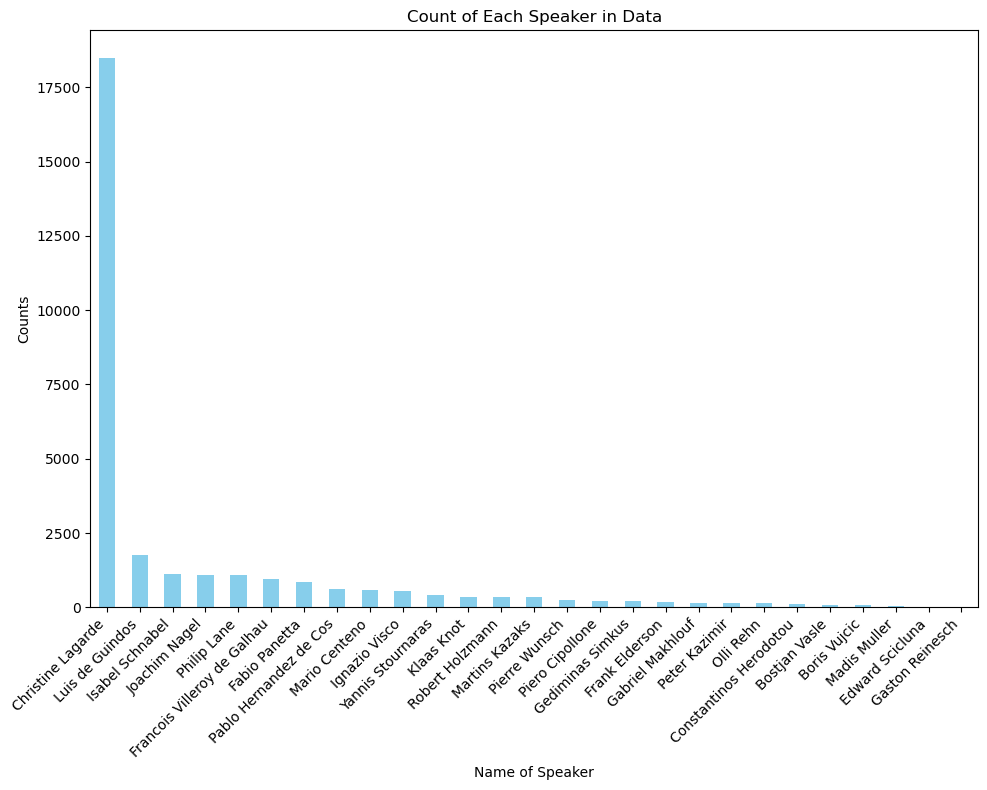

In [63]:
# Assuming df_scraped is already loaded with data

# Count occurrences of each unique value in 'Name_of_Speaker'
name_counts = df_cleaned['Name_of_Speaker'].value_counts()
print(name_counts)


# Plotting the counts
plt.figure(figsize=(10, 8))  # Set the figure size for better readability
name_counts.plot(kind='bar', color='skyblue')  # Create a bar plot
plt.title('Count of Each Speaker in Data')  # Title of the plot
plt.xlabel('Name of Speaker')  # Label for the x-axis
plt.ylabel('Counts')  # Label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust subplots to give some padding
plt.show()  # Display the plot

In [64]:
# Count the occurrences of each media type
media_type_counts = df_cleaned['Media.type'].value_counts()

# Create a DataFrame from the media type counts
media_type_df = media_type_counts.reset_index()
media_type_df.columns = ['Media.type', 'Count']  # Rename columns for clarity

# Show the top 10 most frequent media types
print(media_type_df.head(10))

  Media.type  Count
0        WEB  19810
1      PRINT  10286
2         TV    782
3      RADIO    413
4    SUMMARY     41


In [65]:
# Count of articles per Sitename
site_article_counts = df_cleaned['Sitename'].value_counts()

site_article_counts.head(10)


Sitename
Bloomberg                         1115
Handelsblatt                       923
Milano Finanza                     895
Reuters                            820
Börsen-Zeitung                     728
Expansión                          727
La Stampa                          497
Frankfurter Allgemeine Zeitung     490
La Repubblica                      467
IL SOLE 24 ORE                     412
Name: count, dtype: int64

In [ ]:
asdasdas

In [66]:
#df_cleaned.to_csv('df_cleaned_final_01.csv', index=False)

### EDA Governors Analysis

In [ ]:
import plotly.graph_objects as go

#Create the bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=count_df['Governor'],
    y=count_df['Full Name Count (Scraped Text)'],
    name='Full Name Count (Scraped Text)'
))

fig.add_trace(go.Bar(
    x=count_df['Governor'],
    y=count_df['Full Name Count (Manual Summary)'],
    name='Full Name Count (Manual Summary)'
))

# Update the layout
fig.update_layout(
    title='Comparison of Full Name Counts',
    xaxis_title='Governor',
    yaxis_title='Count',
    barmode='group'
)

# Show the figure
fig.show()


In [ ]:

# Function to check for a match with variations
def has_match(text, name_variations):
    for name in name_variations:
        if re.search(rf'\b{name}\b', text, flags=re.IGNORECASE):
            return True
    return False

# Create a function to generate name variations
def generate_name_variations(full_name, first_name, surname):
    variations = [
        full_name,
        first_name,
        surname,
        f"{first_name} {surname}",
        f"{surname} {first_name}",
        full_name.replace(" ", ""),
        first_name.replace(" ", ""),
        surname.replace(" ", ""),
    ]
    return list(set(variations))  # Ensure unique variations

# List of full names and their variations
name_variations_list = [
    generate_name_variations(row['Full Name'], row['First Name'], row['Surname'])
    for index, row in ECB_df.iterrows()
]

# Check for matches in the preprocessed columns and count articles with at least one match
total_articles = len(df_scraped)
full_name_matches_translated = df_scraped['translated_text_preproc'].apply(
    lambda x: any(has_match(x, name_variations) for name_variations in name_variations_list)
).sum()
full_name_matches_manual = df_scraped['manual_summary_preproc'].apply(
    lambda x: any(has_match(x, name_variations) for name_variations in name_variations_list)
).sum()

# Calculate the proportion of articles with full name matches
full_name_proportion_translated = full_name_matches_translated / total_articles
full_name_proportion_manual = full_name_matches_manual / total_articles

print(f"Full Name Match Statistics:")
print(f"Total articles: {total_articles}")
print(f"Articles with full name match (Translated Text): {full_name_matches_translated} ({full_name_proportion_translated:.2%})")
print(f"Articles with full name match (Manual Summary): {full_name_matches_manual} ({full_name_proportion_manual:.2%})")

# Filter articles without full name matches in the manual summary column and ignore blank entries
articles_without_full_name_match_manual = df_scraped[df_scraped['manual_summary_preproc'].apply(
    lambda x: not any(has_match(x, name_variations) for name_variations in name_variations_list) and x.strip() != ''
)]

# Randomly select 10 examples of such articles
examples_without_full_name_match_manual = articles_without_full_name_match_manual.sample(n=10, random_state=1)

# Display the examples with full content in a more readable format
pd.set_option('display.max_colwidth', None)
print("\nExamples of articles without full name match (Manual Summary):")
for i, row in examples_without_full_name_match_manual.iterrows():
    print(f"Article {i+1}:\n{row['manual_summary_preproc']}\n{'='*80}\n")


Full Name Match Statistics:
Total articles: 35076
Articles with full name match (Translated Text): 29326 (83.61%)
Articles with full name match (Manual Summary): 29040 (82.79%)

Examples of articles without full name match (Manual Summary):
Article 23043:
wage growth euro area still rise timeline inflation ease remains uncertain martin kazak member ecb governing council head latvian central bank advises expecting ecb interest rate cut first half despite ecb ten consecutive key interest rate increase aimed reaching inflation target rate hike ruled kazak economist predict interest rate reduction spring june euro area inflation anticipated take additional two year reach despite expectation slowing price pressure quarterly economic growth projection

Article 15142:
year whateverittakes era central bank brought rate zero made yield usd trillion bond ended january read opinion piece rise sight may year bond bank america friday estimated rush buy bond would continue pointing cue invest put u 

In [ ]:
# Function to check for a match
def has_any_match(text, full_names, first_names, surnames):
    for name in full_names + first_names + surnames:
        if re.search(rf'\b{name}\b', text, flags=re.IGNORECASE):
            return True
    return False

# Lists of names
full_names = ECB_df['Full Name'].tolist()
first_names = ECB_df['First Name'].tolist()
surnames = ECB_df['Surname'].tolist()

# Check for matches in the preprocessed columns and count articles with at least one match
total_articles = len(df_scraped)
any_name_matches_translated = df_scraped['translated_text_preproc'].apply(
    lambda x: has_any_match(x, full_names, first_names, surnames)).sum()
any_name_matches_manual = df_scraped['manual_summary_preproc'].apply(
    lambda x: has_any_match(x, full_names, first_names, surnames)).sum()

# Calculate the proportion of articles with any name matches
any_name_proportion_translated = any_name_matches_translated / total_articles
any_name_proportion_manual = any_name_matches_manual / total_articles

print(f"\nFull Names + First Names + Surnames Match Statistics:")
print(f"Total articles: {total_articles}")
print(f"Articles with any name match (Translated Text): {any_name_matches_translated} ({any_name_proportion_translated:.2%})")
print(f"Articles with any name match (Manual Summary): {any_name_matches_manual} ({any_name_proportion_manual:.2%})")

# Filter articles without any name matches in the manual summary column and ignore blank entries
articles_without_any_name_match_manual = df_scraped[df_scraped['manual_summary_preproc'].apply(
    lambda x: not has_any_match(x, full_names, first_names, surnames) and x.strip() != ''
)]

# Randomly select 10 examples of such articles
examples_without_any_name_match_manual = articles_without_any_name_match_manual.sample(n=10, random_state=1)

# Display the examples with full content in a more readable format
pd.set_option('display.max_colwidth', None)
print("\nExamples of articles without any name match (Manual Summary):")
for i, row in examples_without_any_name_match_manual.iterrows():
    print(f"Article {i+1}:\n{row['manual_summary_preproc']}\n{'='*80}\n")



Full Names + First Names + Surnames Match Statistics:
Total articles: 35076
Articles with any name match (Translated Text): 29298 (83.53%)
Articles with any name match (Manual Summary): 29040 (82.79%)

Examples of articles without any name match (Manual Summary):
Article 23043:
wage growth euro area still rise timeline inflation ease remains uncertain martin kazak member ecb governing council head latvian central bank advises expecting ecb interest rate cut first half despite ecb ten consecutive key interest rate increase aimed reaching inflation target rate hike ruled kazak economist predict interest rate reduction spring june euro area inflation anticipated take additional two year reach despite expectation slowing price pressure quarterly economic growth projection

Article 15142:
year whateverittakes era central bank brought rate zero made yield usd trillion bond ended january read opinion piece rise sight may year bond bank america friday estimated rush buy bond would continue po

In [ ]:
ECB_df.columns

Index(['Full Name', 'First Name', 'Surname', 'Country', 'Position',
       'Executive Role'],
      dtype='object')

In [ ]:
# Save the DataFrame to a CSV file
articles_without_any_name_match_manual.to_csv('articles_without_any_name_match.csv', index=False)


### Spacy Analysis Hawkish & Dovish

In [ ]:
# Download the spaCy model (run this command only once)
#!python -m spacy download en_core_web_sm

In [ ]:
import spacy
from collections import Counter
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Define expanded dovish and hawkish words
dovish_words = [
    "accommodative", "easing", "expansionary", "stimulus", "lower rates", "dovish", "supportive", "lowering rates",
    "quantitative easing", "QE", "liquidity", "easy money", "softening", "growth", "recovery", "reduce", "lowering",
    "decrease", "supportive measures", "boost", "economic support", "fiscal support", "monetary support", "rate cuts",
    "rate reduction", "interest rate cut", "low interest", "maintaining low rates", "deflationary", "deflation", "aid",
    "bailout", "funding", "cash flow", "intervention", "credit easing", "backstop"
]

hawkish_words = [
    "tightening", "contractionary", "restrictive", "hiking", "raising rates", "hawkish", "higher rates", "inflationary",
    "quantitative tightening", "QT", "interest rate hike", "hard money", "hardening", "inflation", "price stability",
    "curbing", "containing inflation", "reducing inflation", "anti-inflationary", "overheating", "fiscal discipline",
    "monetary tightening", "rate hikes", "rate increase", "interest rate rise", "high interest", "reducing stimulus",
    "economic restraint", "budget cuts", "austerity", "monetary discipline", "tapering", "withdrawal of stimulus",
    "debt control", "fiscal consolidation", "financial tightening"
]

# Custom stop words list
custom_stop_words = list(nlp.Defaults.stop_words.union({
    "rate", "ecb", "bank", "central", "euro", "said", "president", "increase", "inflation", "lagarde",
    "interest", "policy", "monetary", "market", "economy", "price", "point", "year", "high", "area", "christine", "mr", "de", "hike",
    "percent", "billion", "million", "trillion", "europe", "union", "currency", "eurosystem", "system", "committee",
    "board", "member", "members", "meeting", "conference", "discussion", "report", "statement", "notes", "speech",
    "publication", "data", "figures", "information", "details", "analysis", "comments", "comment", "commentary", 
    "remarks", "outlook", "forecast", "projections", "expectations", "view", "views", "opinion", "opinions", "perspective",
    "perspectives", "standpoint", "stance", "position", "positions", "policy", "policies", "approach", "approaches", "strategy",
    "strategies", "framework", "frameworks", "program", "programs", "measures", "measure", "tools", "tool", "instrument",
    "instruments", "mechanism", "mechanisms", "method", "methods", "procedure", "procedures", "process", "processes",
    "implementation", "practice", "practices", "execution", "operation", "operations", "activity", "activities", 
    "function", "functions", "role", "roles", "task", "tasks", "responsibility", "responsibilities", "duty", "duties",
    "obligation", "obligations", "commitment", "commitments", "engagement", "engagements", "undertaking", "undertakings", "according", "time", "according", "level", "council", "financial", "expected", "european"
}))

# Function to extract potential sentiment words using spaCy with progress bar
def extract_potential_words(texts, existing_words, label):
    potential_words = []
    for text in tqdm(texts, desc=f"Processing texts with spaCy for {label}"):
        doc = nlp(text)
        for token in doc:
            if token.is_alpha and token.lemma_ not in existing_words and token.lemma_ not in custom_stop_words and token.pos_ in ['ADJ', 'NOUN', 'VERB']:
                potential_words.append(token.lemma_)
    return Counter(potential_words)

# Combine both preprocessed columns
all_texts = df_scraped['translated_text_preproc'].tolist() + df_scraped['manual_summary_preproc'].tolist()

# Extract potential dovish and hawkish words using spaCy
print("Extracting potential dovish words using spaCy...")
dovish_potential_spacy = extract_potential_words(all_texts, dovish_words + hawkish_words, "dovish")

print("Extracting potential hawkish words using spaCy...")
hawkish_potential_spacy = extract_potential_words(all_texts, hawkish_words + dovish_words, "hawkish")

# Initialize TF-IDF Vectorizer with custom stop words
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, max_features=1000)  # Adjust max_features as needed

# Fit and transform the text data with progress bar
print("Calculating TF-IDF scores...")
tfidf_matrix = vectorizer.fit_transform(tqdm(all_texts, desc="TF-IDF transformation"))

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame with TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Calculate mean TF-IDF scores for each word
mean_tfidf_scores = tfidf_df.mean()

# Filter potential words based on their presence in TF-IDF feature names
filtered_dovish_words = [word for word, count in dovish_potential_spacy.items() if word in feature_names]
filtered_hawkish_words = [word for word, count in hawkish_potential_spacy.items() if word in feature_names]

# Get top N TF-IDF words
top_n = 15  # Update to get top 15 words
print("Selecting top dovish words based on TF-IDF scores...")
top_dovish_tfidf = mean_tfidf_scores[filtered_dovish_words].sort_values(ascending=False).head(top_n)

print("Selecting top hawkish words based on TF-IDF scores...")
top_hawkish_tfidf = mean_tfidf_scores[filtered_hawkish_words].sort_values(ascending=False).head(top_n)

# Display the results
print("Top Dovish Words (with TF-IDF):", top_dovish_tfidf)
print("\nTop Hawkish Words (with TF-IDF):", top_hawkish_tfidf)

Extracting potential dovish words using spaCy...


Processing texts with spaCy for dovish:   2%|▏         | 1200/70152 [00:32<31:33, 36.42it/s] 


KeyboardInterrupt: 

In [ ]:
count_df.head(30)

,Governor,Country,Full Name Count (Scraped Text),First Name Count (Scraped Text),Surname Count (Scraped Text),Full Name Count (Manual Summary),First Name Count (Manual Summary),Surname Count (Manual Summary)
0,Christine Lagarde,France,15483,17556,30279,17033,17139,25630
1,Luis de Guindos,Spain,2135,2639,3773,2369,2410,3989
2,Piero Cipollone,Italy,229,281,452,245,252,361
3,Philip Lane,Republic of Ireland,1649,1986,3519,1664,1735,2727
4,Frank Elderson,Netherlands,143,401,288,167,208,263
5,Isabel Schnabel,Germany,1889,2191,3624,2152,2165,3255
6,Pablo Hernandez de Cos,Spain,0,972,0,0,910,0
7,Joachim Nagel,Germany,2000,2238,3913,2297,2317,3646
8,Pierre Wunsch,Belgium,420,590,786,440,455,724
9,Yannis Stournaras,Greece,436,470,1211,627,637,1094


Now we link the sentiment analysis to each governor

In [ ]:
# Function to count sentiment words
def count_sentiment_words(text, sentiment_words):
    doc = nlp(text)
    count = 0
    for token in doc:
        if token.lemma_ in sentiment_words:
            count += 1
    return count

# Adding dovish and hawkish counts to count_df
for index, row in count_df.iterrows():
    full_name = row['Governor']
    # Filter texts containing the governor's name
    governor_texts_translated = df_scraped[df_scraped['translated_text_preproc'].str.contains(full_name, case=False, na=False)]
    governor_texts_manual = df_scraped[df_scraped['manual_summary_preproc'].str.contains(full_name, case=False, na=False)]

    # Count dovish and hawkish words in the filtered texts
    dovish_count_translated = governor_texts_translated['translated_text_preproc'].progress_apply(lambda x: count_sentiment_words(x, dovish_words)).sum()
    hawkish_count_translated = governor_texts_translated['translated_text_preproc'].progress_apply(lambda x: count_sentiment_words(x, hawkish_words)).sum()
    
    dovish_count_manual = governor_texts_manual['manual_summary_preproc'].progress_apply(lambda x: count_sentiment_words(x, dovish_words)).sum()
    hawkish_count_manual = governor_texts_manual['manual_summary_preproc'].progress_apply(lambda x: count_sentiment_words(x, hawkish_words)).sum()
    
    count_df.at[index, 'Dovish Count (Translated)'] = dovish_count_translated
    count_df.at[index, 'Hawkish Count (Translated)'] = hawkish_count_translated
    count_df.at[index, 'Dovish Count (Manual)'] = dovish_count_manual
    count_df.at[index, 'Hawkish Count (Manual)'] = hawkish_count_manual

# Calculate total sentiment-related words for each governor
count_df['Total Dovish'] = count_df['Dovish Count (Translated)'] + count_df['Dovish Count (Manual)']
count_df['Total Hawkish'] = count_df['Hawkish Count (Translated)'] + count_df['Hawkish Count (Manual)']
count_df['Total Sentiment'] = count_df['Total Dovish'] + count_df['Total Hawkish']

# Calculate the proportion of dovish and hawkish words for each governor
count_df['Dovish Proportion'] = count_df['Total Dovish'] / count_df['Total Sentiment']
count_df['Hawkish Proportion'] = count_df['Total Hawkish'] / count_df['Total Sentiment']

# Calculate the hawkish-to-dovish ratio
count_df['Hawkish/Dovish Ratio'] = count_df['Hawkish Proportion'] / count_df['Dovish Proportion']

# Normalize the hawkish and dovish proportions for comparison
count_df['Dovish Score (Normalized)'] = (count_df['Dovish Proportion'] - count_df['Dovish Proportion'].min()) / (count_df['Dovish Proportion'].max() - count_df['Dovish Proportion'].min())
count_df['Hawkish Score (Normalized)'] = (count_df['Hawkish Proportion'] - count_df['Hawkish Proportion'].min()) / (count_df['Hawkish Proportion'].max() - count_df['Hawkish Proportion'].min())

# Sort by Hawkish/Dovish Ratio in descending order
count_df_sorted = count_df.sort_values(by='Hawkish/Dovish Ratio', ascending=False)

# Display the relevant columns
print(count_df_sorted[['Governor', 'Country', 'Dovish Proportion', 'Hawkish Proportion', 'Hawkish/Dovish Ratio', 'Dovish Score (Normalized)', 'Hawkish Score (Normalized)']])

Processing Texts: 100%|██████████| 27/27 [00:00<00:00, 36.99it/s]
Processing Texts: 0it [00:00, ?it/s]
Processing Texts: 0it [00:00, ?it/s]
Processing Texts: 100%|██████████| 74/74 [00:04<00:00, 15.51it/s]
Processing Texts: 0it [00:00, ?it/s]
Processing Texts: 0it [00:00, ?it/s]
Processing Texts: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]
Processing Texts: 0it [00:00, ?it/s]
Processing Texts: 0it [00:00, ?it/s]
Processing Texts: 0it [00:00, ?it/s]
Processing Texts: 0it [00:00, ?it/s]
Processing Texts: 100%|██████████| 1952/1952 [00:32<00:00, 60.44it/s]

                       Governor              Country  Dovish Proportion  \
18              Edward Scicluna                Malta           0.193878   
15             Gediminas Simkus            Lithuania           0.194951   
7                 Joachim Nagel              Germany           0.206675   
13              Robert Holzmann              Austria           0.216397   
16                    Olli Rehn              Finland           0.218750   
5               Isabel Schnabel              Germany           0.220562   
3                   Philip Lane  Republic of Ireland           0.223121   
22                   Klaas Knot          Netherlands           0.231697   
24             Gabriel Makhlouf  Republic of Ireland           0.237212   
10                 Boris Vujcic              Croatia           0.240196   
12  Francois Villeroy de Galhau               France           0.250283   
0             Christine Lagarde               France           0.260120   
8                 Pierre 

In [ ]:
count_df_sorted.head(30)

,Governor,Country,Full Name Count (Scraped Text),First Name Count (Scraped Text),Surname Count (Scraped Text),Full Name Count (Manual Summary),First Name Count (Manual Summary),Surname Count (Manual Summary),Dovish Count (Translated),Hawkish Count (Translated),Dovish Count (Manual),Hawkish Count (Manual),Total Dovish,Total Hawkish,Total Sentiment,Dovish Proportion,Hawkish Proportion,Hawkish/Dovish Ratio,Dovish Score (Normalized),Hawkish Score (Normalized)
18,Edward Scicluna,Malta,23,50,48,17,33,32,34.0,119.0,4.0,39.0,38.0,158.0,196.0,0.193878,0.806122,4.157895,0.000000,1.000000
15,Gediminas Simkus,Lithuania,118,333,229,4,348,6,136.0,565.0,3.0,9.0,139.0,574.0,713.0,0.194951,0.805049,4.129496,0.003053,0.996947
7,Joachim Nagel,Germany,2000,2238,3913,2297,2317,3646,2361.0,7866.0,1020.0,5112.0,3381.0,12978.0,16359.0,0.206675,0.793325,3.838509,0.036401,0.963599
13,Robert Holzmann,Austria,725,1025,1342,893,962,1327,727.0,2372.0,371.0,1604.0,1098.0,3976.0,5074.0,0.216397,0.783603,3.621129,0.064054,0.935946
16,Olli Rehn,Finland,282,308,569,236,239,395,237.0,740.0,85.0,410.0,322.0,1150.0,1472.0,0.218750,0.781250,3.571429,0.070745,0.929255
5,Isabel Schnabel,Germany,1889,2191,3624,2152,2165,3255,2723.0,8225.0,1115.0,5338.0,3838.0,13563.0,17401.0,0.220562,0.779438,3.533872,0.075899,0.924101
3,Philip Lane,Republic of Ireland,1649,1986,3519,1664,1735,2727,2247.0,6859.0,814.0,3799.0,3061.0,10658.0,13719.0,0.223121,0.776879,3.481869,0.083179,0.916821
22,Klaas Knot,Netherlands,964,1021,1867,1057,1065,1568,1253.0,3571.0,418.0,1970.0,1671.0,5541.0,7212.0,0.231697,0.768303,3.315978,0.107571,0.892429
24,Gabriel Makhlouf,Republic of Ireland,309,378,686,287,304,491,349.0,1045.0,124.0,476.0,473.0,1521.0,1994.0,0.237212,0.762788,3.215645,0.123256,0.876744
10,Boris Vujcic,Croatia,84,193,140,0,136,1,98.0,310.0,0.0,0.0,98.0,310.0,408.0,0.240196,0.759804,3.163265,0.131745,0.868255


### Loughran McDonald

In [ ]:
import pandas as pd
from tqdm import tqdm
import re

# Load Loughran-McDonald Master Dictionary
file_path = 'Loughran-McDonald_MasterDictionary_1993-2023.csv'
master_dictionary_df = pd.read_csv(file_path)

# Extract sentiment words from the Loughran-McDonald dictionary
negative_words = set(master_dictionary_df[master_dictionary_df['Negative'] > 0]['Word'].str.lower())
positive_words = set(master_dictionary_df[master_dictionary_df['Positive'] > 0]['Word'].str.lower())
uncertainty_words = set(master_dictionary_df[master_dictionary_df['Uncertainty'] > 0]['Word'].str.lower())
litigious_words = set(master_dictionary_df[master_dictionary_df['Litigious'] > 0]['Word'].str.lower())
constraining_words = set(master_dictionary_df[master_dictionary_df['Constraining'] > 0]['Word'].str.lower())

# Function to count sentiment words
def count_sentiment_words(text, sentiment_words):
    words = re.findall(r'\b\w+\b', text.lower())
    count = sum(1 for word in words if word in sentiment_words)
    return count

# Adding Loughran-McDonald sentiment counts to count_df
for index, row in count_df.iterrows():
    full_name = row['Governor']
    # Filter texts containing the governor's name
    governor_texts_translated = df_scraped[df_scraped['translated_text_preproc'].str.contains(full_name, case=False, na=False)]
    governor_texts_manual = df_scraped[df_scraped['manual_summary_preproc'].str.contains(full_name, case=False, na=False)]
    
    # Concatenate all texts for each governor
    all_texts_translated = " ".join(governor_texts_translated['translated_text_preproc'])
    all_texts_manual = " ".join(governor_texts_manual['manual_summary_preproc'])
    
    # Count sentiment words in the concatenated texts
    count_df.at[index, 'LM_Negative_Count'] = count_sentiment_words(all_texts_translated, negative_words) + count_sentiment_words(all_texts_manual, negative_words)
    count_df.at[index, 'LM_Positive_Count'] = count_sentiment_words(all_texts_translated, positive_words) + count_sentiment_words(all_texts_manual, positive_words)
    count_df.at[index, 'LM_Uncertainty_Count'] = count_sentiment_words(all_texts_translated, uncertainty_words) + count_sentiment_words(all_texts_manual, uncertainty_words)
    count_df.at[index, 'LM_Litigious_Count'] = count_sentiment_words(all_texts_translated, litigious_words) + count_sentiment_words(all_texts_manual, litigious_words)
    count_df.at[index, 'LM_Constraining_Count'] = count_sentiment_words(all_texts_translated, constraining_words) + count_sentiment_words(all_texts_manual, constraining_words)

# Calculate total sentiment-related words for each governor
count_df['Total_LM_Sentiment'] = (count_df['LM_Negative_Count'] + count_df['LM_Positive_Count'] +
                                  count_df['LM_Uncertainty_Count'] + count_df['LM_Litigious_Count'] +
                                  count_df['LM_Constraining_Count'])

# Calculate the proportion of each sentiment type for each governor
count_df['LM_Positive_Proportion'] = count_df['LM_Positive_Count'] / count_df['Total_LM_Sentiment']
count_df['LM_Negative_Proportion'] = count_df['LM_Negative_Count'] / count_df['Total_LM_Sentiment']
count_df['LM_Uncertainty_Proportion'] = count_df['LM_Uncertainty_Count'] / count_df['Total_LM_Sentiment']
count_df['LM_Litigious_Proportion'] = count_df['LM_Litigious_Count'] / count_df['Total_LM_Sentiment']
count_df['LM_Constraining_Proportion'] = count_df['LM_Constraining_Count'] / count_df['Total_LM_Sentiment']

# Sort by LM Positive Proportion in descending order, then by LM Negative Proportion in ascending order
count_df_sorted = count_df.sort_values(by=['LM_Positive_Proportion', 'LM_Negative_Proportion'], ascending=[False, True])

# Display the relevant columns
print(count_df_sorted[['Governor', 'Country', 'LM_Positive_Count', 'LM_Negative_Count', 'LM_Uncertainty_Count', 'LM_Litigious_Count', 'LM_Constraining_Count', 'LM_Positive_Proportion', 'LM_Negative_Proportion', 'LM_Uncertainty_Proportion', 'LM_Litigious_Proportion', 'LM_Constraining_Proportion']])


                       Governor              Country  LM_Positive_Count  \
2               Piero Cipollone                Italy              864.0   
11              Gaston Reinesch           Luxembourg               37.0   
23       Constantinos Herodotou               Cyprus              527.0   
6        Pablo Hernandez de Cos                Spain               89.0   
1               Luis de Guindos                Spain             9636.0   
25                Fabio Panetta                Italy             6974.0   
0             Christine Lagarde               France            55928.0   
9             Yannis Stournaras               Greece             1459.0   
17                Mario Centeno             Portugal             1118.0   
10                 Boris Vujcic              Croatia              170.0   
12  Francois Villeroy de Galhau               France             2231.0   
3                   Philip Lane  Republic of Ireland             5280.0   
7                 Joachim

In [ ]:
count_df_sorted.head(30)[['Governor', 'Country', 'LM_Positive_Count', 'LM_Negative_Count', 'LM_Uncertainty_Count', 'LM_Litigious_Count', 'LM_Constraining_Count', 'LM_Positive_Proportion', 'LM_Negative_Proportion', 'LM_Uncertainty_Proportion', 'LM_Litigious_Proportion', 'LM_Constraining_Proportion']]


,Governor,Country,LM_Positive_Count,LM_Negative_Count,LM_Uncertainty_Count,LM_Litigious_Count,LM_Constraining_Count,LM_Positive_Proportion,LM_Negative_Proportion,LM_Uncertainty_Proportion,LM_Litigious_Proportion,LM_Constraining_Proportion
2,Piero Cipollone,Italy,864.0,1092.0,689.0,155.0,264.0,0.281984,0.356397,0.224869,0.050587,0.086162
11,Gaston Reinesch,Luxembourg,37.0,72.0,27.0,29.0,6.0,0.216374,0.421053,0.157895,0.169591,0.035088
23,Constantinos Herodotou,Cyprus,527.0,1147.0,566.0,88.0,121.0,0.215190,0.468354,0.231115,0.035933,0.049408
6,Pablo Hernandez de Cos,Spain,89.0,179.0,98.0,38.0,34.0,0.203196,0.408676,0.223744,0.086758,0.077626
1,Luis de Guindos,Spain,9636.0,24503.0,12567.0,1413.0,2583.0,0.190052,0.483275,0.247860,0.027869,0.050945
25,Fabio Panetta,Italy,6974.0,15752.0,9592.0,2124.0,2950.0,0.186510,0.421267,0.256525,0.056804,0.078894
0,Christine Lagarde,France,55928.0,148400.0,81831.0,9190.0,20923.0,0.176835,0.469216,0.258736,0.029057,0.066155
9,Yannis Stournaras,Greece,1459.0,4139.0,2094.0,195.0,442.0,0.175171,0.496938,0.251411,0.023412,0.053068
17,Mario Centeno,Portugal,1118.0,3215.0,1697.0,206.0,395.0,0.168602,0.484844,0.255919,0.031066,0.059569
10,Boris Vujcic,Croatia,170.0,485.0,289.0,25.0,45.0,0.167653,0.478304,0.285010,0.024655,0.044379
